In [7]:
import numpy as np
from itertools import islice
import statistics
import matplotlib.pyplot as plt

In [8]:
# data structure

# the data is stored in 2D array data[hlidx][rdidx]

# each graph is stored as 2D array at data[hlidx][rdidx]
# graph[stidx][wkidx]

hl = [14, 16]
_hl = { 14: 0, 16: 1}

rd = [0, 500]
_rd = { 0: 0, 500: 1}

st = ['big', 'newrcu', 'rcu']
_st = { 'big': 0, 'newrcu': 1, 'rcu': 2 }
stcolor = ['red', 'blue', 'green']
stlabel = ['single mutex', 'Partial RCU', 'RCU']
stmarker = ['o', 'o', 'o']

wk = [2, 4, 6, 8]
_wk = { 2: 0, 4: 1, 6: 2, 8: 3 }

data = np.zeros((2,2,3,4))


In [11]:
# read from file
fname = 'data/result1.txt'

fh = open(fname, 'r')

while True:
    param = fh.readline()
    if not param:
        break
    ps = param.split()
    next5 = [float(x.split()[1]) for x in list(islice(fh, 5))]
    data[_hl[int(ps[2])]][_rd[int(ps[3])]][_st[ps[0]]][_wk[int(ps[1])]] = statistics.median(next5)

print(data)


[[[[ 9.91066 10.8015   9.49634  9.36249]
   [21.8869  39.2157  55.0926  64.6998 ]
   [20.7282  40.5055  54.6875  67.7874 ]]

  [[ 3.05556  3.05329  3.02641  2.94768]
   [ 5.74324 10.6956  15.4476  19.7092 ]
   [ 5.76369 10.4619  15.3257  19.6386 ]]]


 [[[ 3.52914  3.15956  2.98954  3.0922 ]
   [ 6.86704 11.6005  15.8282  18.7816 ]
   [ 6.69985 11.4694  15.8328  19.0217 ]]

  [[ 1.91378  1.79381  1.84394  1.81469]
   [ 3.8931   7.24368  9.57627 12.7058 ]
   [ 3.78788  6.75676  9.87544 12.2992 ]]]]


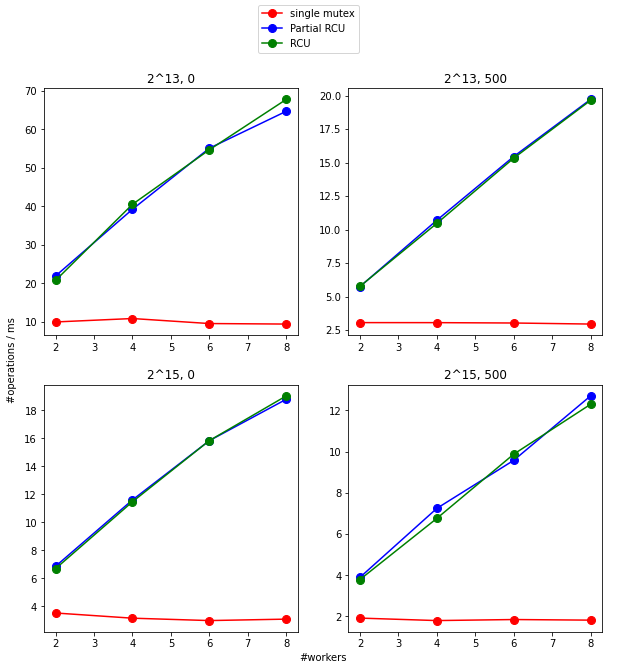

In [12]:
# draw the graphs

plt.rcParams["figure.figsize"] = (10,10)

fig, axs = plt.subplots(2, 2)

for hlidx in range(2):
    for rdidx in range(2):
        axs[hlidx][rdidx].set_title('2^{}, {}'.format(hl[hlidx]-1, rd[rdidx]))
        for stidx in range(3):
            axs[hlidx][rdidx].plot(wk, data[hlidx][rdidx][stidx], 
                                   color=stcolor[stidx], label=stlabel[stidx],
                                   marker=stmarker[stidx], markersize=8);
#         axs[hlidx][rdidx].legend()
            
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("#workers")
plt.ylabel("#operations / ms")
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
